In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import matplotlib.gridspec as gridspec
from Orange.data import Table, Domain, ContinuousVariable
from Orange.clustering.kmeans import KMeans
import misc as ut

In [2]:
headers, data = ut.open_data("./data/adjacency_by_days.csv")

In [3]:
data = np.array(data)

In [4]:
data.shape

(12720, 41)

In [5]:
domain = [ContinuousVariable(c) for c in headers]
data_table = Table.from_numpy(Domain(domain), X=data, Y=None)

In [6]:
n_clust = 50
kmeans = KMeans(n_clusters=n_clust, n_init=5, random_state=42)

In [7]:
clusters = kmeans(data_table)

In [8]:
centroids = []
for c in range(n_clust):
    indices = np.where(clusters == c)[0]
    clust = np.mean(data_table[indices].X, axis=0)
    centroids.append(list(clust))
centroids = np.array(centroids)

In [9]:
centroids.shape

(50, 41)

In [10]:
eps = 1e-7

In [11]:
np.savetxt("./data/centroids.csv", centroids)
np.savetxt("./data/centroids_logs.csv", np.log(centroids + eps))

In [12]:
centroids.shape # 50 centroids, 41 days

(50, 41)

## Heatmaps

In [13]:
main_data = np.genfromtxt(f"./data/polo_centroids_cosine.csv", skip_header=2, delimiter=",")

In [14]:
order_cols = np.genfromtxt(f"./data/polo_centroids_order_cols_cosine.csv", delimiter=",")
order_cols = [int(x)+1 for x in order_cols]

In [15]:
main_data.shape

(50, 41)

In [16]:
Z = np.genfromtxt("./data/polo_linkage_cosine.csv")#, delimiter=",")

/var/folders/1w/wvs3yw9s1rsg8349s7lnvvj80000gn/T/ipykernel_79953/134147683.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([0, 10, 20, 30, 40, 50], fontsize=fontsize);


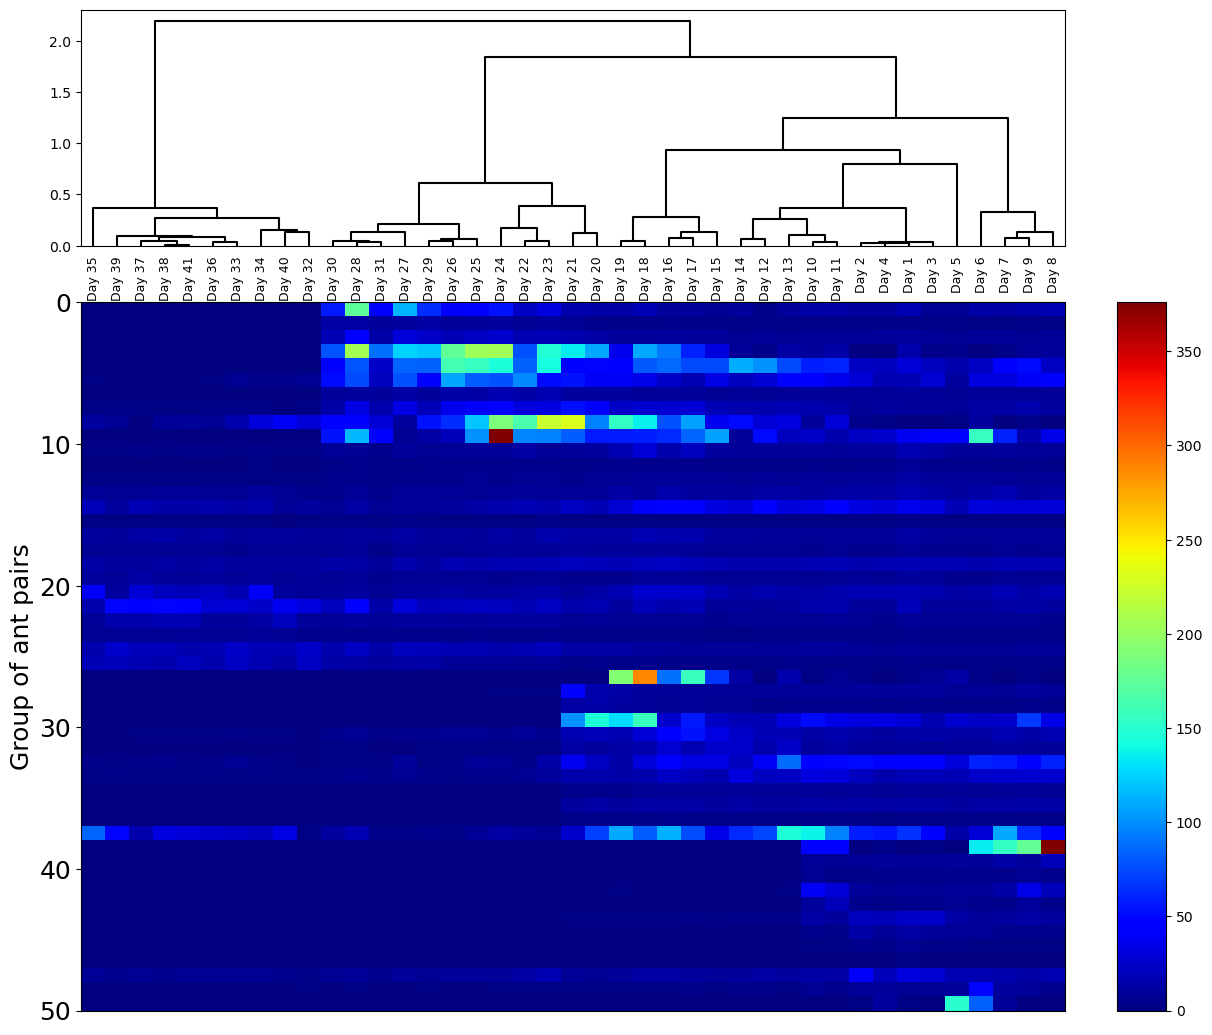

In [17]:
fontsize = 18
gs = gridspec.GridSpec(2, 2,
                       height_ratios=[1, 3],
                       width_ratios=[20, 1],
                       hspace=0.12,
                       wspace=0.1)
fig = plt.figure(figsize=(14, 13))
cmap = "jet"
labels = ["Day " + str(x) for x in list(range(1, 42))]
ax1 = fig.add_subplot(gs[0, 0])
dendrogram(Z, ax=ax1, labels=labels, link_color_func=lambda k: 'k', leaf_font_size=9) # Z - linkage
ax2 = fig.add_subplot(gs[1, 0])
a = ax2.pcolor(main_data, cmap=cmap)
ax2.invert_yaxis()
ax2.set_yticklabels([0, 10, 20, 30, 40, 50], fontsize=fontsize)
ax2.set_xticks([])
plt.ylabel("Group of ant pairs", fontsize=fontsize)
ax3 = fig.add_subplot(gs[1, 1])
fig.colorbar(a, cax=ax3)

plt.savefig("figures/centroids_days_cosine_dendrogram.png", bbox_inches = 'tight')#, dpi=600);

In [18]:
# 3 subplots
skip_header = 2
data1 = np.genfromtxt(f"./data/polo_days_{1}_{19}.csv", skip_header=skip_header, delimiter=",")
data2 = np.genfromtxt(f"./data/polo_days_{20}_{31}.csv", skip_header=skip_header, delimiter=",")
data3 = np.genfromtxt(f"./data/polo_days_{32}_{41}.csv", skip_header=skip_header, delimiter=",")

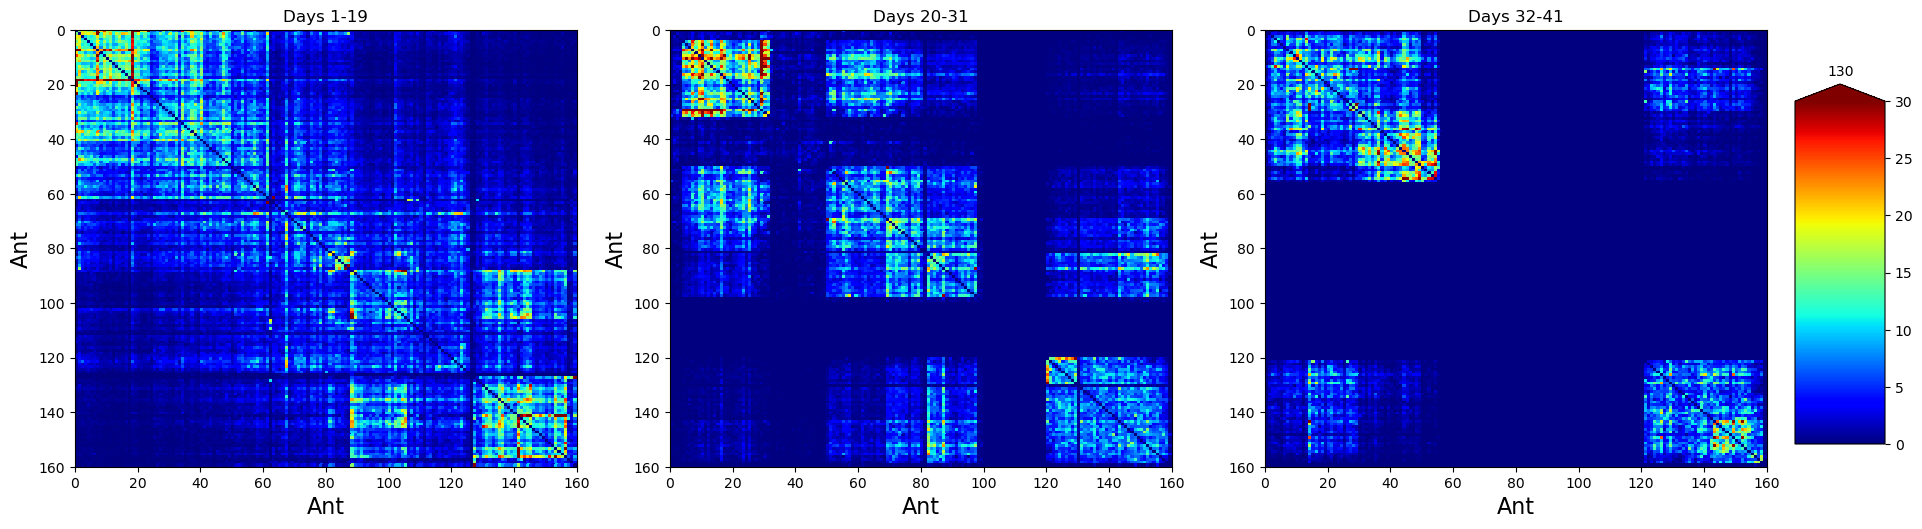

In [19]:
ut.plot_days(data1, data2, data3)